In [146]:
#1 타이타닉 생존자 예측 머신러닝 프로그램
#2 데이터 수집(엑셀)
#3.필요한 라이브러리 import

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#인라인은 박스의 반대말 -> 한줄 안에 다 넣어버리겠다

In [148]:
raw_data = pd.read_excel('titanic.xls')

In [149]:
raw_data.info() #데이터 항목 타입 보여줌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [150]:
raw_data.describe() #수치적으로 요약해서 보여줌

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [151]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


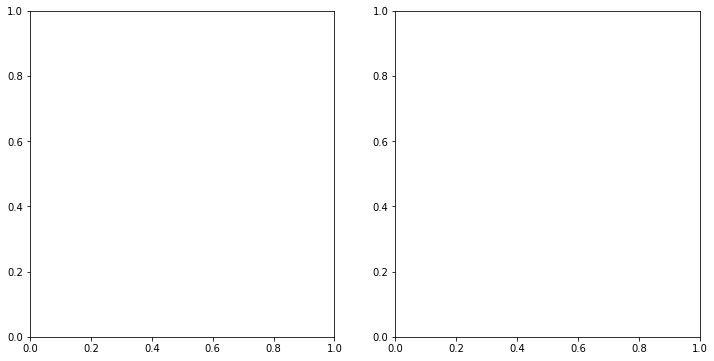

In [152]:
f,ax=plt.subplots(1,2,figsize=(12,6)) #matplotlib의 subplot

In [153]:
raw_data['survived'].value_counts() #survived 칼럼의 values(값), 카운트화하여 = 0은 800, 1은 500

0    809
1    500
Name: survived, dtype: int64

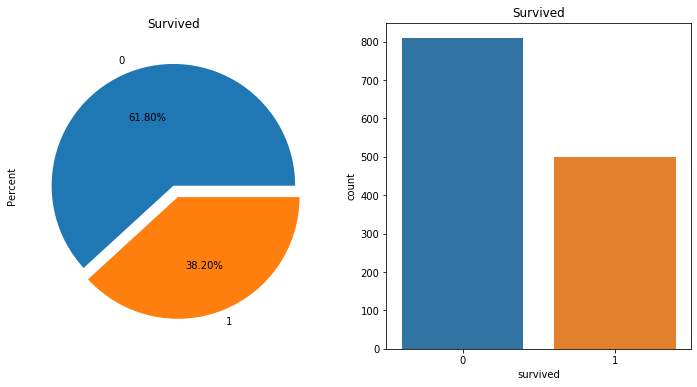

In [154]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[0])

#autopct는 소수점을 어떻게 할 것인가 소수점 2째짜리까지, ax = 0번째 그래프에 넣음
ax[0].set_title('Survived')
ax[0].set_ylabel('Percent') #ylabe은 y 타이틀 정해주는것임

#countplot은 막대그래프를 그림, data는 데이터프레임을 넣어줌
sns.countplot('survived', data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

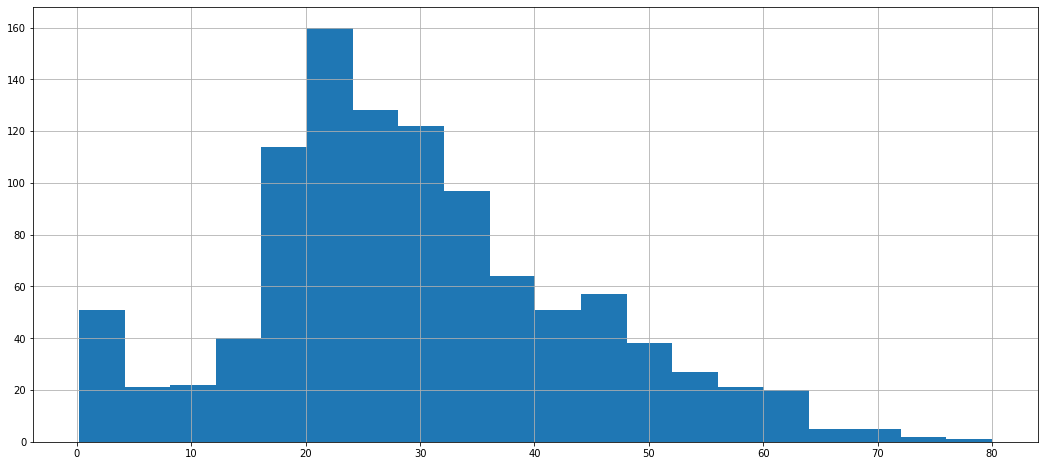

In [155]:
#나이를 히스토그램으로 그리기
raw_data['age'].hist(bins=20, figsize=(18,8))

In [156]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [157]:
raw_data.corr() #상관도 = 공분산 : 두개의 상관도가 있는것에 따라 그래프를 그림 (상향선이든 하향선이든)
#pclass 가 늘어날수록, survived -> 감소함

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [158]:
#1. 일단 +,- 든 높은 상관도를 가지는 값들을 찾아낸다. ( survive, age, fare 등)
#2. 중요한 파라미터 판단 
#ex) 등급칸이 올라갈수록(=낮은등급일수록), 생존은 떨어진다. 음의 상관 관계도를 가진다.
#ex) 클래스가 높아질수록, 저가요금이금. 높은 상관관계를 가진다.

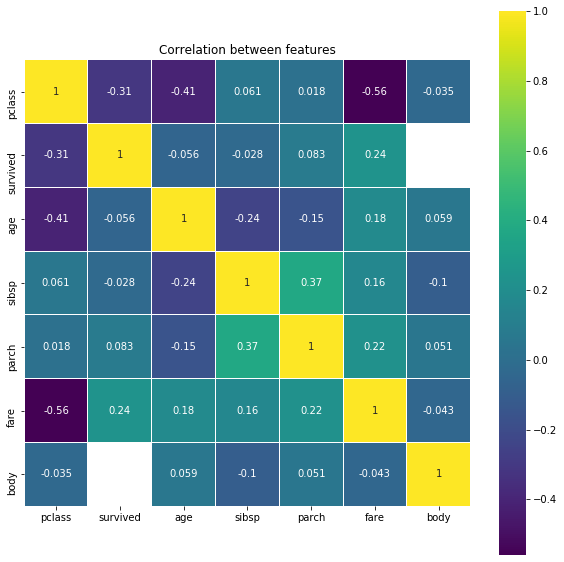

In [159]:
#히트맵 -> 상관도 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [160]:
raw_data['age_cat'] = pd.cut(raw_data['age'], 
                             bins=[0, 3, 7, 15, 30, 60, 100], 
                             include_lowest=True, 
                             labels=['baby', 'children', 'teenage', 
                                     'young', 'adult', 'old'])
raw_data.head()


#카테고리 범위를 설정
 #최소값 포함
#cut 기능 통해 카테고리를 만듦

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [161]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


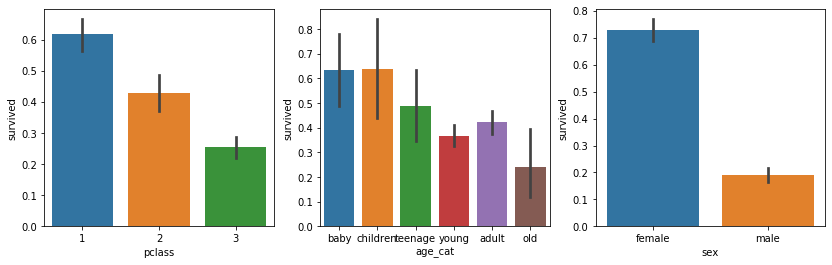

In [162]:
#막대그래프 그리는 함수

plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data) #막대그래프 : 사용할칼럼 2개 지정

plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)

plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)

# plt.subplot(132)
# sns.barplot('age_cat', 'survived', data=raw_data)
# plt.subplot(133)
# sns.barplot('sex', 'survived', data=raw_data)
# plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

In [163]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()
#notnull -> boat에 탄 사람들과 아닌 사람 null 이 아니면 = true(보트에 탐), null이면 false(=보트에 못탐)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


In [164]:
boat_survivors

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,3,1,"Turja, Miss. Anna Sofia",female,18.0000,0,0,4138,9.8417,NaN,S,15,NaN,NaN,young
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0000,0,0,4134,9.5875,NaN,S,15,NaN,NaN,old
1277,3,1,"Vartanian, Mr. David",male,22.0000,0,0,2658,7.2250,NaN,C,13 15,NaN,NaN,young
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0000,0,0,2688,7.2292,NaN,C,C,NaN,NaN,adult


In [165]:
boat_survivors['survived'].value_counts() #survived 칼럼의 values(값), > 1은 삶, 0은 죽음

1    477
0      9
Name: survived, dtype: int64

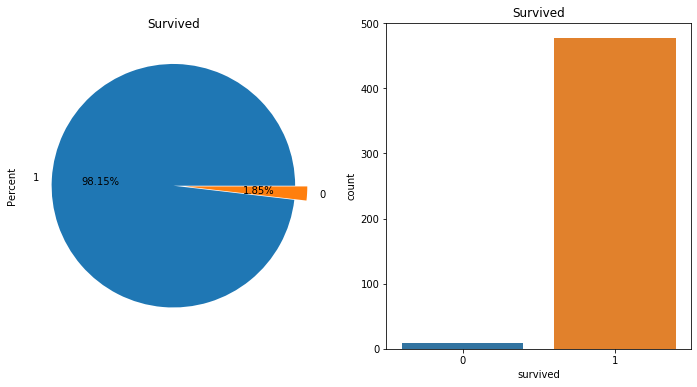

In [166]:
f,ax=plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[0])

#autopct는 소수점을 어떻게 할 것인가 소수점 2째짜리까지, ax = 0번째 그래프에 넣음
ax[0].set_title('Survived')
ax[0].set_ylabel('Percent') #ylabe은 y 타이틀 정해주는것임

#countplot은 막대그래프를 그림, data는 데이터프레임을 넣어줌
sns.countplot('survived', data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [167]:
train_pre = raw_data[['survived','pclass','sex','age','sibsp','parch','fare']] #학습데이터전 = 상관도 높은 피처만 넣음
train_pre.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,0,1,female,2.0000,1,2,151.5500
3,0,1,male,30.0000,1,2,151.5500
4,0,1,female,25.0000,1,2,151.5500


In [173]:
#결측치 not null -> 아닌것만을 표본으로 가져와서 처리함.
train_pre = train_pre[train_pre['age'].notnull()]
train_pre = train_pre[train_pre['sibsp'].notnull()]
train_pre= train_pre[train_pre['parch'].notnull()]
train_pre = train_pre[train_pre['fare'].notnull()]
train_pre = train_pre[train_pre['sex'].notnull()]
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1045 non-null   int64  
 1   pclass    1045 non-null   int64  
 2   sex       1045 non-null   object 
 3   age       1045 non-null   float64
 4   sibsp     1045 non-null   int64  
 5   parch     1045 non-null   int64  
 6   fare      1045 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 65.3+ KB


In [174]:
train_pre = train_pre[train_pre['sex'].notnull()]

In [176]:
tmp = []
for each in train_pre['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

In [179]:
train_pre['sex'] = tmp #tmp : 0과 1로 된걸 반영시킴
train_pre.head()

,survived,pclass,sex,age,sibsp,parch,fare,survied
0,1,1.0,0,29.0000,0.0,0.0,211.3375,1.0
1,1,1.0,1,0.9167,1.0,2.0,151.5500,1.0
2,0,1.0,0,2.0000,1.0,2.0,151.5500,0.0
3,0,1.0,1,30.0000,1.0,2.0,151.5500,0.0
4,0,1.0,0,25.0000,1.0,2.0,151.5500,0.0


In [180]:
train_pre['pclass'] = train_pre['pclass'].astype('float') #float으로 칼럼 형 변환
train_pre['sex'] = train_pre['sex'].astype('float')
train_pre['sibsp'] = train_pre['sibsp'].astype('float')
train_pre['parch'] = train_pre['parch'].astype('float')
train_pre['fare'] = train_pre['fare'].astype('float')
train_pre['survied'] = train_pre['survived'].astype('float')
train_pre.head()

,survived,pclass,sex,age,sibsp,parch,fare,survied
0,1,1.0,0.0,29.0000,0.0,0.0,211.3375,1.0
1,1,1.0,1.0,0.9167,1.0,2.0,151.5500,1.0
2,0,1.0,0.0,2.0000,1.0,2.0,151.5500,0.0
3,0,1.0,1.0,30.0000,1.0,2.0,151.5500,0.0
4,0,1.0,0.0,25.0000,1.0,2.0,151.5500,0.0


In [182]:
train_pre2 = train_pre[['pclass','sex','age','sibsp','parch','fare']] #학습데이터를 따로 옮김
train_pre2.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500


In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre2, 
                                                    train_pre[['survied']], 
                                                    test_size=0.2, 
                                                    random_state=13)

#사이킷런으로 학습데이터, 결론데이터 / 내 학습데이터, 내 결론 데이터 나눔

In [201]:
X_train.info() #학데

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 996 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  836 non-null    float64
 1   sex     836 non-null    float64
 2   age     836 non-null    float64
 3   sibsp   836 non-null    float64
 4   parch   836 non-null    float64
 5   fare    836 non-null    float64
dtypes: float64(6)
memory usage: 45.7 KB


In [202]:
X_test.info() #결데

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 699 to 1025
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  209 non-null    float64
 1   sex     209 non-null    float64
 2   age     209 non-null    float64
 3   sibsp   209 non-null    float64
 4   parch   209 non-null    float64
 5   fare    209 non-null    float64
dtypes: float64(6)
memory usage: 11.4 KB


In [203]:
y_train.info() #내학데

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 996 to 378
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   survied  836 non-null    float64
dtypes: float64(1)
memory usage: 13.1 KB


In [204]:
y_test.info() #내결데

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 699 to 1025
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   survied  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [205]:
X_train

,pclass,sex,age,sibsp,parch,fare
996,3.0,1.0,33.0,0.0,0.0,7.8958
306,1.0,1.0,54.0,0.0,1.0,77.2875
636,3.0,0.0,18.0,1.0,0.0,17.8000
862,3.0,0.0,22.0,0.0,0.0,8.9625
730,3.0,1.0,27.0,0.0,0.0,7.8958
...,...,...,...,...,...,...
1017,3.0,1.0,21.0,0.0,0.0,7.7750
822,3.0,1.0,41.0,0.0,0.0,7.8500
83,1.0,0.0,64.0,1.0,1.0,26.5500
200,1.0,1.0,46.0,0.0,0.0,75.2417


In [206]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

#인덱스 정렬화

In [207]:
X_train

,pclass,sex,age,sibsp,parch,fare
0,3.0,1.0,33.0,0.0,0.0,7.8958
1,1.0,1.0,54.0,0.0,1.0,77.2875
2,3.0,0.0,18.0,1.0,0.0,17.8000
3,3.0,0.0,22.0,0.0,0.0,8.9625
4,3.0,1.0,27.0,0.0,0.0,7.8958
...,...,...,...,...,...,...
831,3.0,1.0,21.0,0.0,0.0,7.7750
832,3.0,1.0,41.0,0.0,0.0,7.8500
833,1.0,0.0,64.0,1.0,1.0,26.5500
834,1.0,1.0,46.0,0.0,0.0,75.2417


In [216]:
y_train

,survied
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
831,1.0
832,0.0
833,1.0
834,0.0


In [219]:
#의사결정 라이브러리
#머신러닝 학습데이터 -> X_train -> y_train(생존여부) / Decision Treee로 학습화시켜, 0과 1로 살 여부를 맞출 확률이 80%가 나옴.
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))
#머신러닝이 자체적으로 돌면서 X_train (나이,성별,등급 등 조건으로) -> y_train(0과 1에 대한 결과를 맞출 확률이 80% )

Score: 0.8074162679425837


In [209]:
#정확도 테스트
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test) #tree_clf 학습 모델 객체안에 X_test라는 내가 빼놓은 데이터를 넣어, y_pred(살 여부를 확인함!)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100) #y_test 는 내가 빼놓은 정답 데이터, (y_test / y_pred) * 100 = 77%
#이 모델에 대한 정확도는 77%

Test Accuracy is  77.99043062200957


In [210]:
# pclass, sex, age, sibsp, parch, fare
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

In [211]:
tree_clf.predict_proba([winslet])
#0은 -> 죽을확률, 인덱스 1은 살 확률

array([[0.00909091, 0.99090909]])

In [198]:
tree_clf.predict_proba([dicaprio])
#0은 죽은확률, 인덱스 1은 살 확률

array([[0.875, 0.125]])

In [217]:
jiheon = [2, 1, 31, 0, 0, 20]
tree_clf.predict_proba([jiheon])
#ㅠㅠ.. 

array([[0.86910995, 0.13089005]])

## 그래프비즈 Graphviz

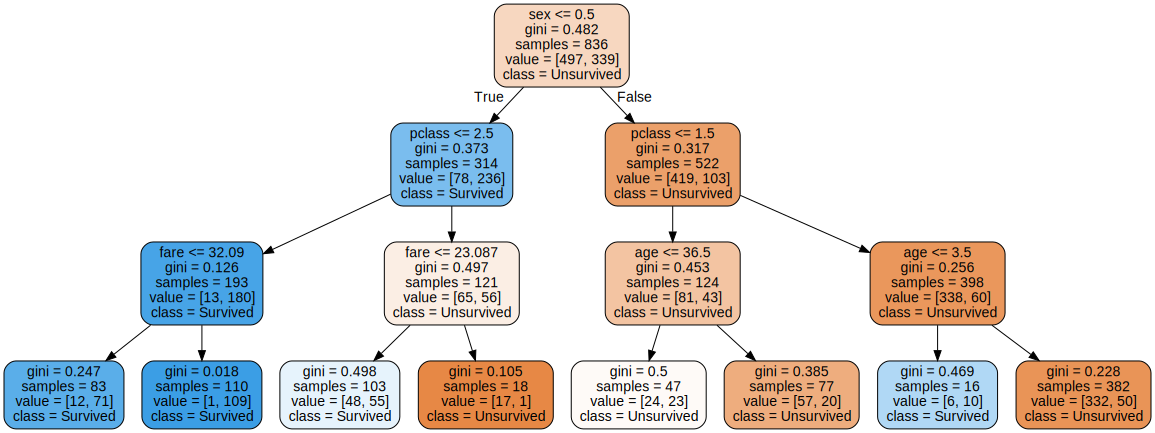

In [220]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot